In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize

#from scipy.ndimage import gaussian_filter1d
import sys

In [2]:
xcentersAtTOF0 = np.array([234.27344982136592, 246.8782863642303, 237.5792309061526]) # pixel
xcentersATTOF10 = np.array([143.92961442371083, 241.89641379285104, 193.3565968441275]) #pixel
objectiveLensPztVoltage = np.array([6.70, 7.20, 6.95]) #[V]

In [3]:
factorToConvertObjectiveLensPztVoltageIntoDistance = 10 #[um/V]
factorToConvertPixelIntoDistance = 1/5 #[um/pixel]

In [4]:
centerOfAtomsInDimple = (xcentersAtTOF0 - np.max(xcentersAtTOF0))*factorToConvertPixelIntoDistance #[um]
dipoleOscillationAmplitude = (xcentersATTOF10 - xcentersAtTOF0)*factorToConvertPixelIntoDistance #[um]
centerOfAtomsInVlattice = centerOfAtomsInDimple + dipoleOscillationAmplitude/2 #[um]
distanceBtwnLayers = (objectiveLensPztVoltage - np.max(objectiveLensPztVoltage)) * factorToConvertObjectiveLensPztVoltageIntoDistance#[um]

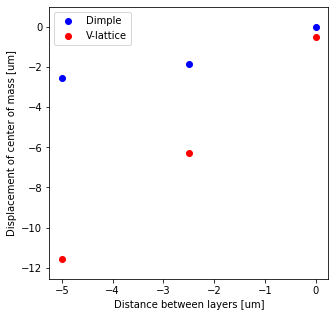

In [5]:
fig =plt.figure(figsize=[5,5])
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(distanceBtwnLayers, centerOfAtomsInDimple, color = "b", label = "Dimple")
ax1.scatter(distanceBtwnLayers, centerOfAtomsInVlattice, color = "r", label = "V-lattice")
ax1.set_xlabel('Distance between layers [um]')
ax1.set_ylabel('Displacement of center of mass [um]')
ax1.set_ylim(np.min(centerOfAtomsInVlattice)-1,np.max(centerOfAtomsInDimple)+1)
ax1.legend()

In [6]:
para_ini = [1, np.min(dipoleOscillationAmplitude)]
xmin = np.min(distanceBtwnLayers)
xmax = np.max(distanceBtwnLayers)

def linear(x,*fit_param):
    return fit_param[0]*x+fit_param[1]

def fit_result(fit_func, x_data_list, y_data_list, initial_param_list, yerr=None):
    if (yerr is None):
        param, cov = scipy.optimize.curve_fit(fit_func, x_data_list, y_data_list, p0 = initial_param_list)
    else:
        param, cov = scipy.optimize.curve_fit(fit_func, x_data_list, y_data_list, p0 = initial_param_list, sigma=yerr)
    perr = np.sqrt(np.diag(cov))
    x_fit_list = np.linspace(np.min(x_data_list),np.max(x_data_list))
    y_fit_list = []
    for num in x_fit_list:
        y_fit_list.append(fit_func(num, *param))
    return param, perr, x_fit_list, y_fit_list

fitResultsOfCenterOfAtomsInDimple_list = fit_result(linear, distanceBtwnLayers, centerOfAtomsInDimple, para_ini)
fitResultsOfCenterOfAtomsInVlattice_list = fit_result(linear, distanceBtwnLayers, centerOfAtomsInVlattice, para_ini)

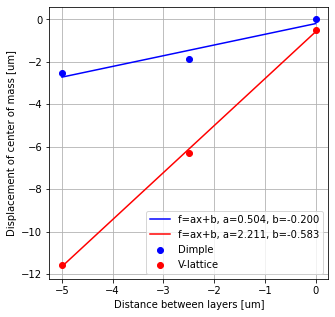

In [7]:


fig =plt.figure(figsize=[5,5])
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(distanceBtwnLayers, centerOfAtomsInDimple,c="b", label="Dimple")
ax1.plot(fitResultsOfCenterOfAtomsInDimple_list[2], fitResultsOfCenterOfAtomsInDimple_list[3], c="b", label= "f=ax+b, a=%.03f, b=%.03f"%(fitResultsOfCenterOfAtomsInDimple_list[0][0],fitResultsOfCenterOfAtomsInDimple_list[0][1]))
ax1.scatter(distanceBtwnLayers, centerOfAtomsInVlattice,c="r", label="V-lattice")
ax1.plot(fitResultsOfCenterOfAtomsInVlattice_list[2], fitResultsOfCenterOfAtomsInVlattice_list[3], c="r", label= "f=ax+b, a=%.03f, b=%.03f"%(fitResultsOfCenterOfAtomsInVlattice_list[0][0],fitResultsOfCenterOfAtomsInVlattice_list[0][1]))
ax1.set_xlabel('Distance between layers [um]')
ax1.set_ylabel('Displacement of center of mass [um]')
# ax1.set_ylim(np.min(dipoleOscillationAmplitude/2)-1,0)
ax1.legend()
ax1.set_axisbelow(True)
ax1.grid()


In [8]:
print("Tilt of Dimple from Z-axis = %.03f [degree]"%(np.arctan(fitResultsOfCenterOfAtomsInDimple_list[0][0])/np.pi*180))
print("Title of V-lattice from z-axis = %.03f [degree]"%(np.arctan(2.211)/np.pi*180))

Tilt of Dimple from Z-axis = 26.757 [degree]
Title of V-lattice from z-axis = 65.664 [degree]
